<a href="https://colab.research.google.com/github/jsparraq/test-repository/blob/main/Sebas%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data_folder = "./data"

In [96]:
solar_eclipses = pd.read_csv(data_folder + "/solar.csv")

In [97]:
solar_eclipses.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN


### Variables

**Catalog Number:** Es un identificador

**Calendar date:** Fecha del evento, *Tipo de dato -> [Categórica]*

**Eclipse Time:** Hora del evento. *Tipo de dato -> [Numerica]*

**Delta T(s):** Es la diferencia de tiempo obtenida al restar el Tiempo Universal del Tiempo Terrestre. *Tipo de dato -> [Numerica]*

**Lunation number:** El Número de Lunación es el número de meses sinódicos desde la Luna Nueva de 2000 Ene 06. *Tipo de dato -> [Numerica]*

**Saros number:** Es un periodo de tiempo de 223 lunas (meses sinódicos), lo que equivale a 6585.32 días. *Tipo de dato -> [Numérica]*

**Eclypse Type:** Tipos de eclipses solares. *Tipo de dato -> [Categorica]*
    
     P = Eclipse Parcial.
     A = Eclipse anular.
     T = Eclipse total.
     H = Eclipse híbrido o anular/total.

    Segundo carácter del Tipo de Eclipse:
     "m" = Eclipse central de la serie Saros.
     "n" = Eclipse central sin límite norte.
     "s" = Eclipse central sin límite sur.
     "+" = Eclipse no central sin límite norte.
     "-" = Eclipse no central sin límite sur.
     "2" = La trayectoria híbrida comienza total y termina anular.
     "3" = La trayectoria híbrida comienza anular y termina total.
     "b" = Comienza la serie Saros (primer eclipse de la serie).
     "e" = La serie Saros termina (último eclipse de la serie).
   
**Gamma:** De un eclipse describe la centralidad con la que la sombra de la Luna o de la Tierra incide sobre el otro cuerpo. *Tipo de dato -> [Numérica]*

**Eclipse Magnitude:** Es la fracción del diámetro angular de un cuerpo celeste que se eclipse. *Tipo de dato -> [Numérica]*

**Latitude:** Es la distancia angular entre la línea ecuatorial (el ecuador). *Tipo de dato -> [Numerica]*

**Longitude:** Es un concepto métrico definible para entidades geométricas sobre las que se ha definido una distancia. *Tipo de dato -> [Numerica]*

**Sun Altitude:** Es el ángulo del sol en relación con el horizonte de la Tierra, y se mide en grados. La altitud es nula al amanecer y al atardecer, y puede alcanzar un máximo de 90 grados (directamente por encima) al mediodía en latitudes cercanas al ecuador. *Tipo de dato -> [Numerica]*

**Sun Azimuth:** Es el ángulo entre la proyección del centro del sol sobre el plano horizontal y la dirección sur. *Tipo de dato -> [Numerica]*

**Path Width (km):** Anchura de la trayectoria de la totalidad. *Tipo de dato -> [Numérica]*

**Central Duration:** Tiempo que dura el eclipse en el centro del otro cuerpo. *Tipo de dato -> [Numérica]*

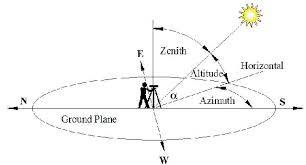

In [98]:
## Se elimina la primera columna por lo que es un identificador que no aporta al dataset información
solar_eclipses.drop(['Catalog Number'], axis=1, inplace=True)

In [99]:
solar_eclipses.head()

,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN


In [106]:
## Se transforman las longitudes a valores númericos entre -180 y 180
def convert_longitude_to_numerical(longitude):
    degrees = longitud[:-1]
    word = longitud[-1]
    degrees = float(degrees)
    if word == "W":
        return degrees*-1
    return degrees

## Se transforman las latitudes a valores númericos entre -180 y 180
def convert_latitude_to_numerical(latitude):
    degrees = latitude[:-1]
    word = latitude[-1]
    degrees = float(degrees)
    if word == "S":
        return degrees*-1
    return degrees

## Cambiar central duration a segundos
def convert_central_duration_to_seconds(central_duration):
    minutes_index = central_time.index("m")
    minutes = int(central_time[:minutes_index])
    return (minutes*60) + int(central_time[minutes_index + 1:-1])

def fix_path_width(path_width):
    if path_width == None:
        return None
    elif path_width == "-":
        return None
    return float(path_width)

In [110]:
solar_eclipses['Longitude'] = solar_eclipses['Longitude'].apply(lambda longitud: convert_longitude_to_numerical(longitud))
solar_eclipses['Latitude'] = solar_eclipses['Latitude'].apply(lambda latitude: convert_latitude_to_numerical(latitude))
solar_eclipses['Central Duration'] = solar_eclipses['Central Duration'].apply(lambda time: convert_central_duration_to_seconds(time))
solar_eclipses['Path Width (km)'] = solar_eclipses['Path Width (km)'].apply(lambda path_width: fix_path_width(path_width))

In [111]:
solar_eclipses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11898 entries, 0 to 11897
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Calendar Date      11898 non-null  object 
 1   Eclipse Time       11898 non-null  object 
 2   Delta T (s)        11898 non-null  int64  
 3   Lunation Number    11898 non-null  int64  
 4   Saros Number       11898 non-null  int64  
 5   Eclipse Type       11898 non-null  object 
 6   Gamma              11898 non-null  float64
 7   Eclipse Magnitude  11898 non-null  float64
 8   Latitude           11898 non-null  float64
 9   Longitude          11898 non-null  float64
 10  Sun Altitude       11898 non-null  int64  
 11  Sun Azimuth        11898 non-null  int64  
 12  Path Width (km)    7517 non-null   float64
 13  Central Duration   11898 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.3+ MB
